In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import sys
import os
import glob
import random
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
# Read dataset
df = pd.read_csv(r'D:\Google Drive\University of York courses\Independent Research Proposal\dissertation\data\preprocessed\preprocessed_final_data.csv')
df["unique_id_time"] = df['month_event'].astype('string') + "-" + df['year_event'].astype('string')
print("Rows: ", df.shape[0])
print("Features: " + str(df.shape[1]) + "\n")
df.head(3)

Rows:  65340
Features: 39



,unique_id,month_event,year_event,key_neighb,name_neigh,key_boroug,name_borou,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60,geometry,unique_id_time
0,2019502-001,5,2019,02-001,AGUILERA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43,1,0,2,1,0,1,0,0,0,POLYGON ((483311.6179775769 2153254.8476758953...,5-2019
1,2019502-002,5,2019,02-002,ALDANA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56,1,0,0,0,0,0,0,0,0,POLYGON ((484406.9560281149 2153012.3314251634...,5-2019
2,2019502-005,5,2019,02-005,ANGEL ZIMBRON,2,AZCAPOTZALCO,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89,3,2,1,1,2,0,0,0,0,POLYGON ((480013.7551967221 2153003.6181812417...,5-2019


# Create stratified sample

In [5]:
ddf = df[(df.year_event==2019) & (df.month_event==1)]
ddf.key_neighb.value_counts().sum()

1815

In [6]:
dfs = ddf[["name_borou", "key_neighb"]].reset_index(drop=True)
print(dfs.shape, '\n')
dfs.head(3)

(1815, 2) 



,name_borou,key_neighb
0,AZCAPOTZALCO,02-001
1,AZCAPOTZALCO,02-002
2,AZCAPOTZALCO,02-005


In [7]:
dfs_pt = pd.pivot_table(dfs, index=["name_borou"], values='key_neighb', 
                         aggfunc={'count'}).reset_index()
dfs_pt

,name_borou,count
0,ALVARO OBREGON,250
1,AZCAPOTZALCO,111
2,BENITO JUAREZ,64
3,COYOACAN,153
4,CUAJIMALPA DE MORELOS,43
5,CUAUHTEMOC,64
6,GUSTAVO A. MADERO,232
7,IZTACALCO,55
8,IZTAPALAPA,293
9,LA MAGDALENA CONTRERAS,52


In [8]:
n = 30 #n = 318 is the appropriate sample size
sample = dfs.groupby('name_borou', group_keys=False).apply(lambda x: x.sample(int(np.rint(n*len(x)/len(dfs))))).sample(frac=1).reset_index(drop=True)
sample.head()

,name_borou,key_neighb
0,TLAHUAC,11-034
1,ALVARO OBREGON,10-156
2,IZTACALCO,06-057
3,TLALPAN,12-026
4,ALVARO OBREGON,10-030


In [9]:
sample.name_borou.value_counts()

IZTAPALAPA                5
ALVARO OBREGON            4
GUSTAVO A. MADERO         4
TLALPAN                   3
COYOACAN                  3
AZCAPOTZALCO              2
TLAHUAC                   1
IZTACALCO                 1
MIGUEL HIDALGO            1
CUAJIMALPA DE MORELOS     1
BENITO JUAREZ             1
LA MAGDALENA CONTRERAS    1
VENUSTIANO CARRANZA       1
XOCHIMILCO                1
CUAUHTEMOC                1
Name: name_borou, dtype: int64

In [10]:
# Stratified sample of neighborhoods to perform exploratory analysis

sample_neighborhoods = sample['key_neighb'].to_list()
df_sample = df[df.key_neighb.isin(sample_neighborhoods)].reset_index(drop=True)
print(df_sample.shape, '\n')
df_sample.head()

(1080, 39) 



,unique_id,month_event,year_event,key_neighb,name_neigh,key_boroug,name_borou,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60,geometry,unique_id_time
0,2019502-087,5,2019,02-087,SAN SALVADOR XOCHIMANCA,2,AZCAPOTZALCO,0,1,0,0,0,1,0,0,2,0,16,1,0,2,0,1,0,1,33,21,56,2,0,1,1,0,0,0,0,0,POLYGON ((481357.0109271135 2151951.9693246796...,5-2019
1,2019502-109,5,2019,02-109,VILLAS AZCAPOTZALCO (U HAB),2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,POLYGON ((479629.3786557262 2155147.7152749347...,5-2019
2,2019514-005,5,2019,14-005,AMERICAS UNIDAS-DEL LAGO,14,BENITO JUAREZ,0,1,0,1,0,4,0,0,0,0,11,2,1,4,0,0,0,1,70,16,128,11,5,9,3,4,6,0,0,0,POLYGON ((485017.4349651186 2142849.8107815688...,5-2019
3,2019507-278,5,2019,07-278,JUAN ESCUTIA II,7,IZTAPALAPA,0,2,0,0,1,4,3,0,0,0,71,1,1,7,0,0,0,10,265,43,254,1,2,2,2,1,0,1,0,0,POLYGON ((495855.02293505473 2143671.467169447...,5-2019
4,2019507-151,5,2019,07-151,PALMITAS,7,IZTAPALAPA,0,0,0,0,0,0,0,0,0,1,2,0,0,3,0,0,0,4,217,30,132,2,0,2,0,0,0,1,0,0,"POLYGON ((497336.5905815735 2137475.852268937,...",5-2019


# Exploratory analysis

In [11]:
neighborhoods_sample = list(df_sample.key_neighb.unique())

In [12]:
crime_counts_series = df_sample[["unique_id_time", "crime_count", "name_neigh"]]
crime_counts_series["time"] = pd.to_datetime(crime_counts_series["unique_id_time"])
crime_counts_series = crime_counts_series.sort_values(by=["time"]).reset_index(drop=True)
crime_counts_series["time"] = crime_counts_series["time"].dt.strftime('%m-%Y')
crime_counts_series = crime_counts_series[["time", "crime_count", "name_neigh"]]
crime_counts_series.head()

C:\Users\penny\AppData\Local\Temp/ipykernel_25980/2207275922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_counts_series["time"] = pd.to_datetime(crime_counts_series["unique_id_time"])


,time,crime_count,name_neigh
0,01-2019,0,EL ZACATON
1,01-2019,2,PRESIDENTES
2,01-2019,2,MINAS DE CRISTO
3,01-2019,0,COLINAS DE TARANGO
4,01-2019,0,BELEN DE LAS FLORES SECCION RELLENO


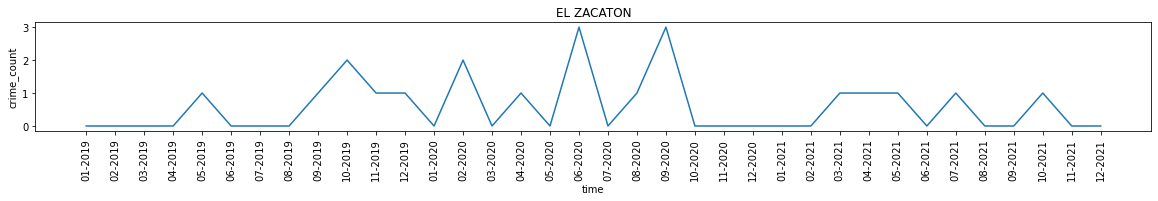

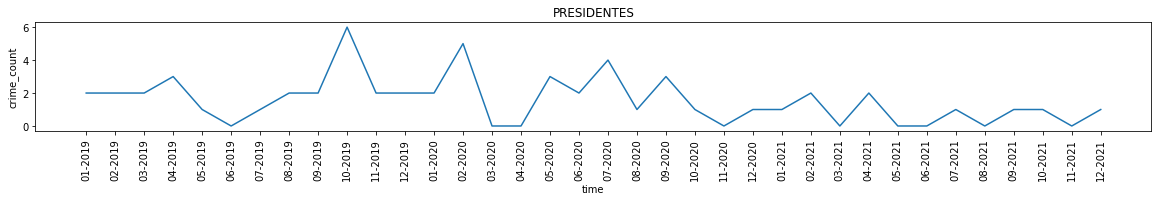

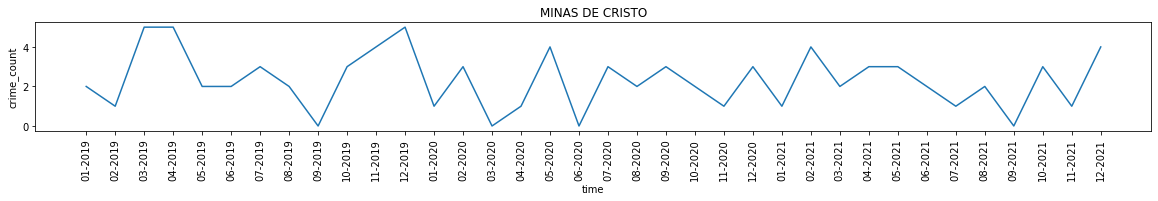

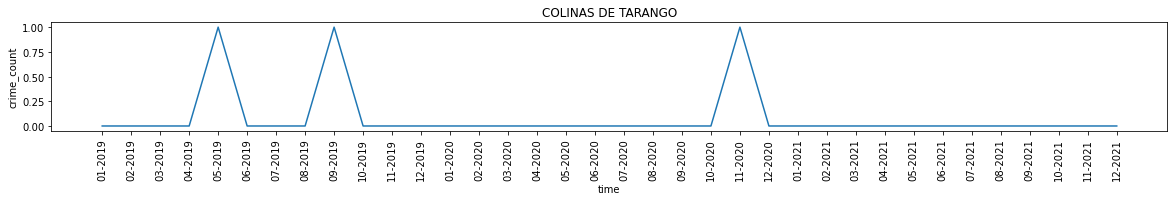

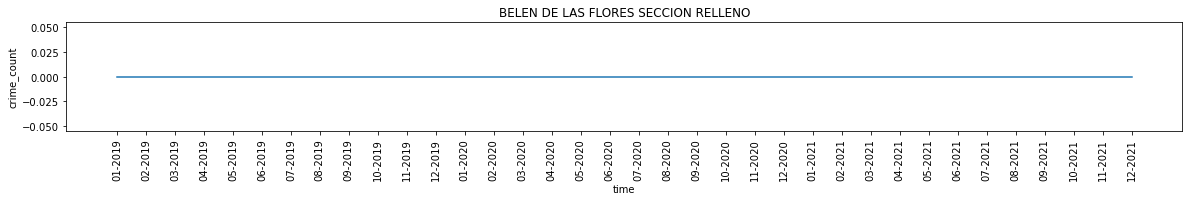

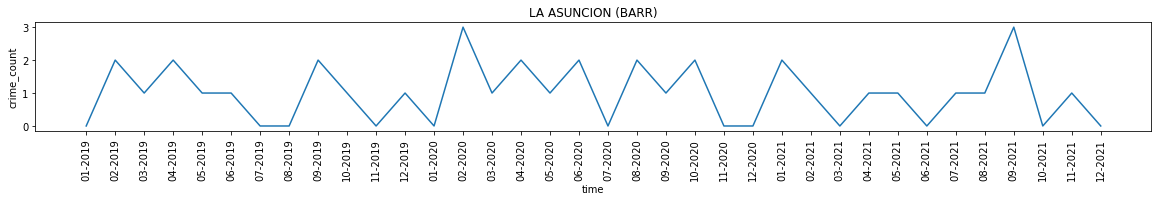

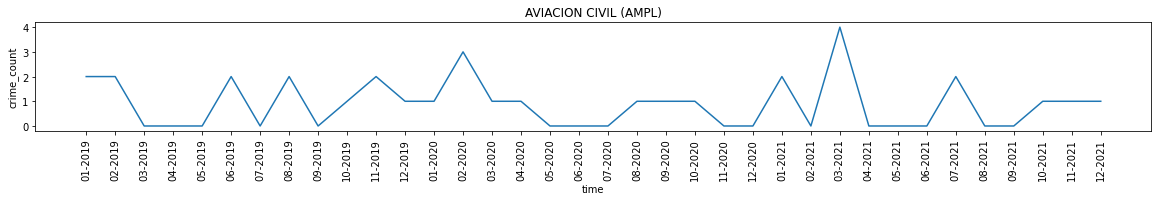

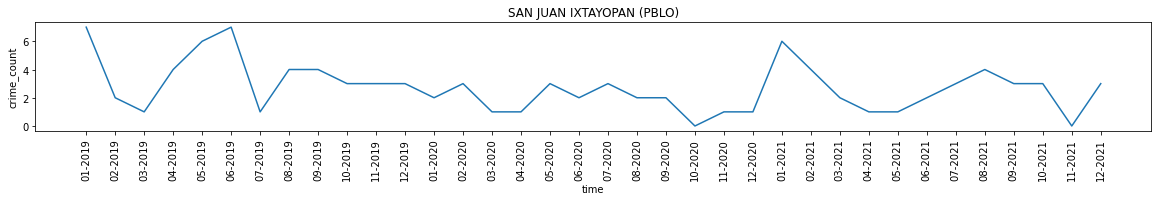

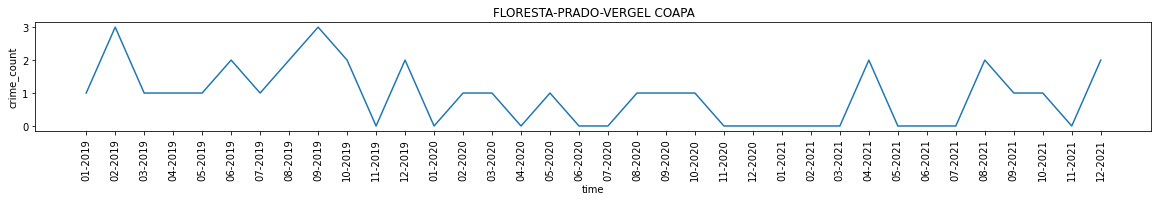

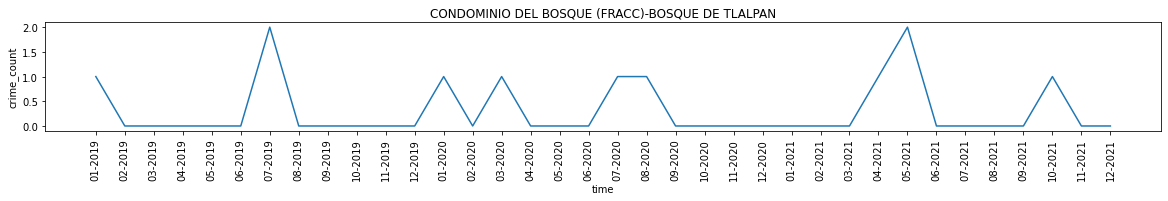

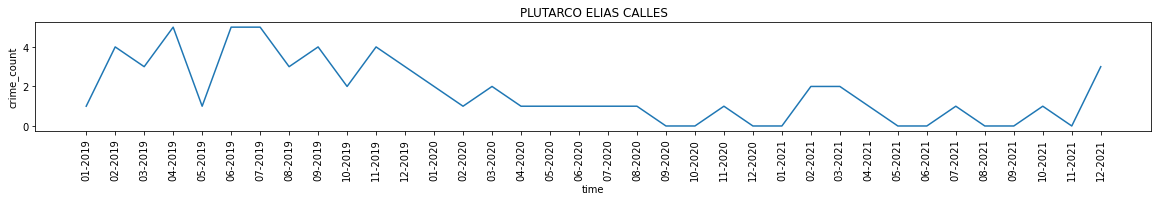

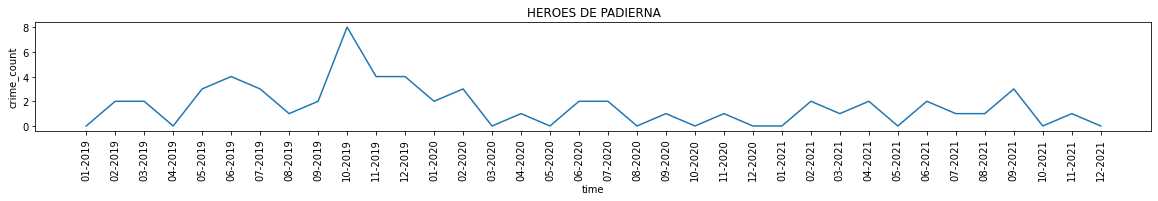

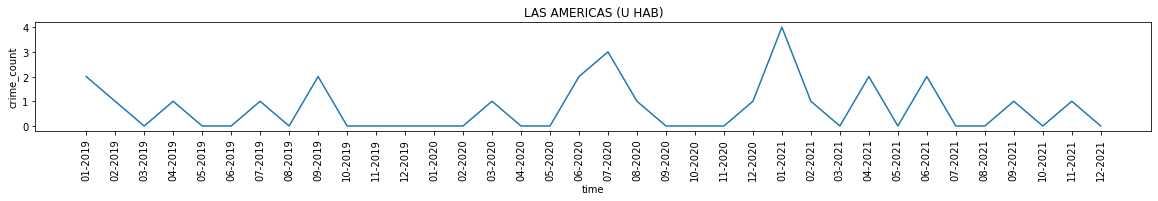

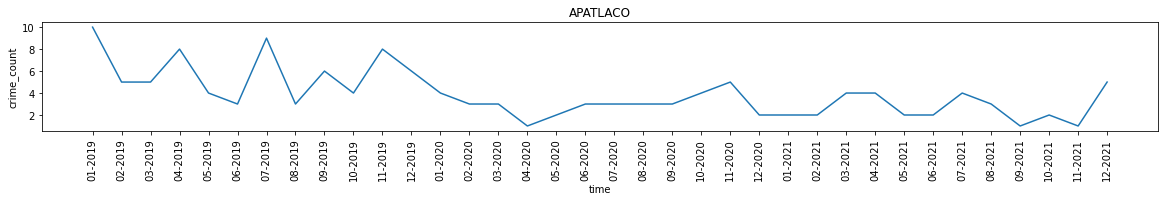

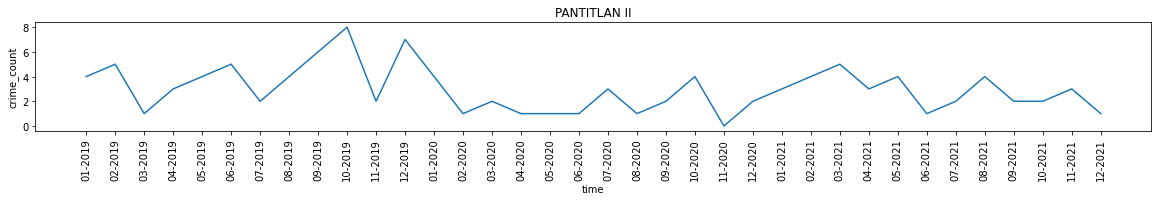

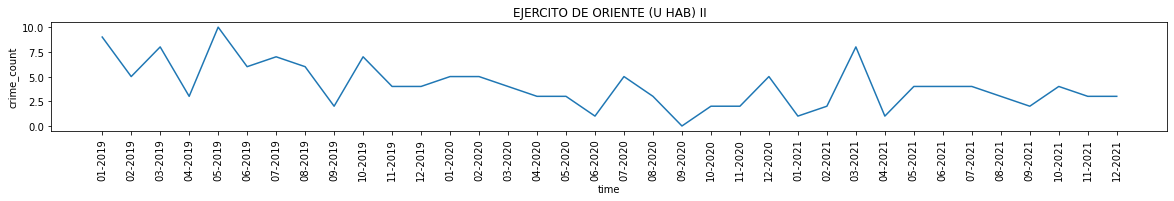

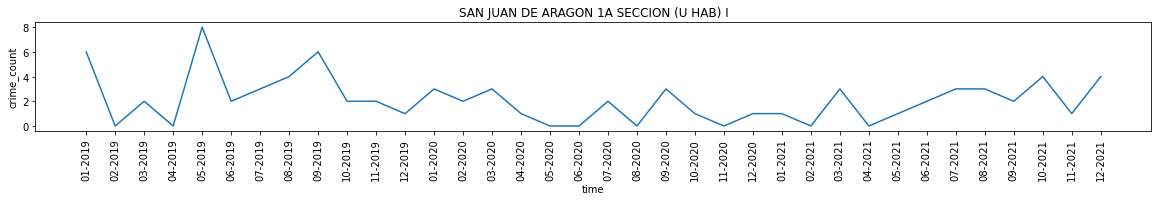

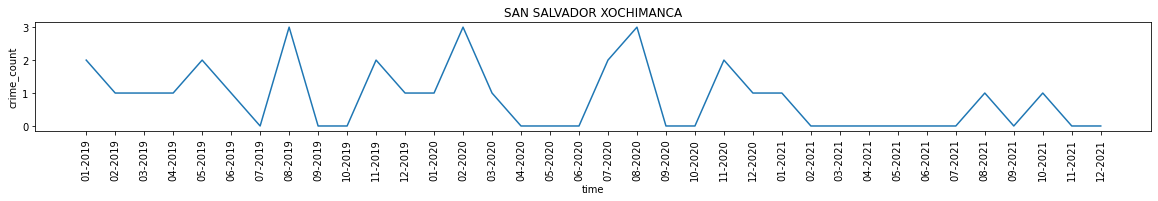

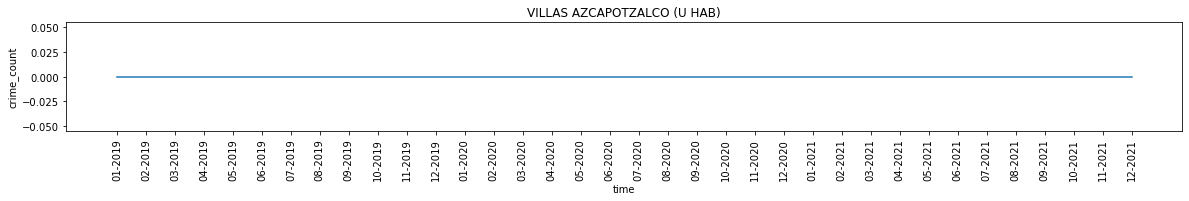

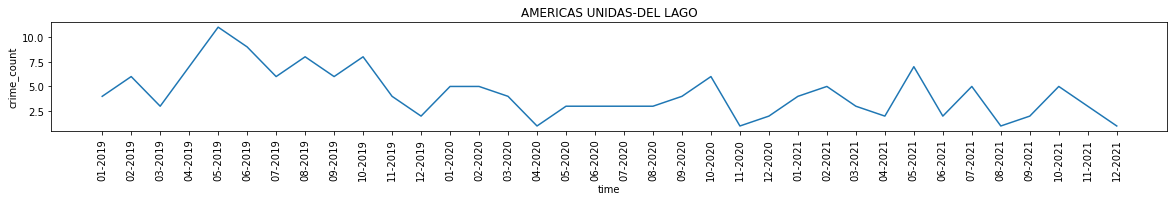

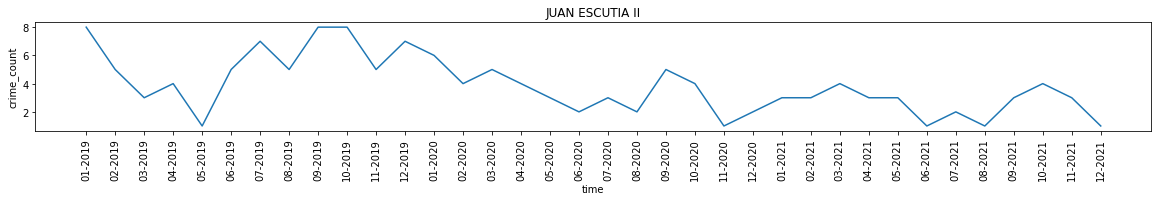

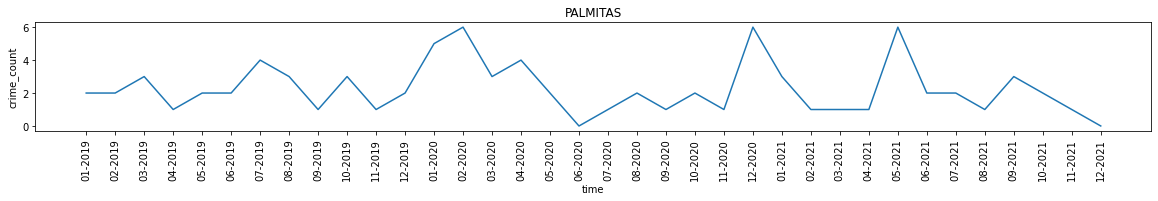

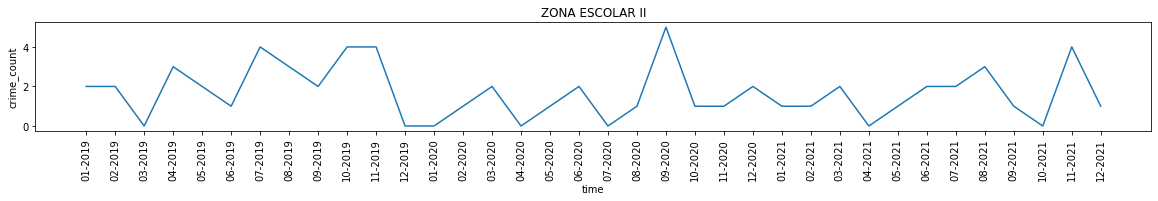

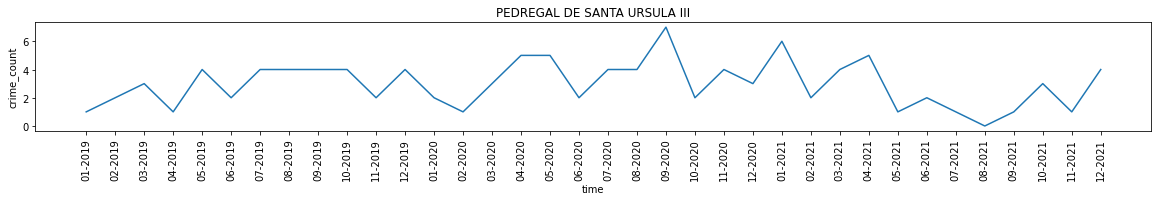

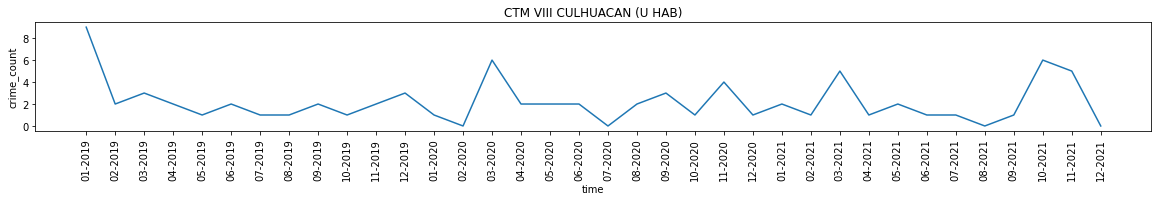

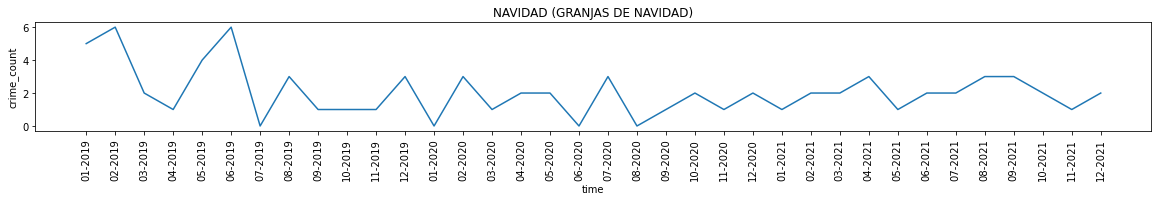

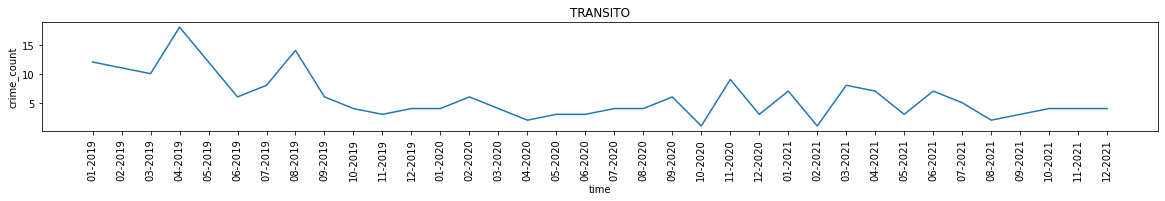

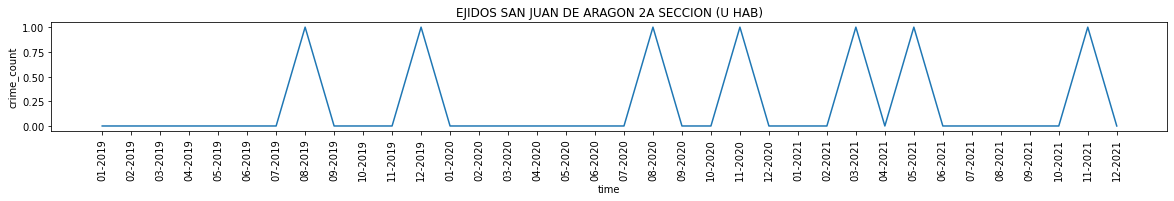

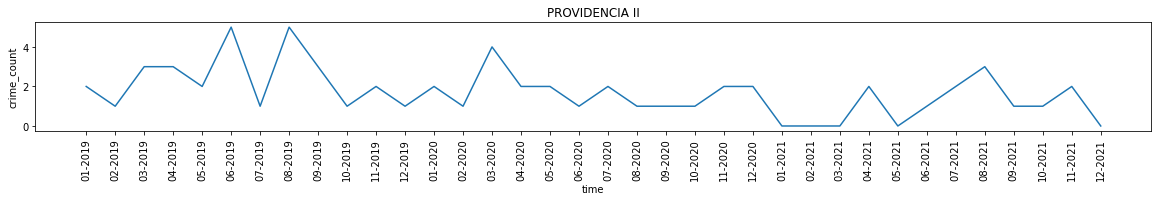

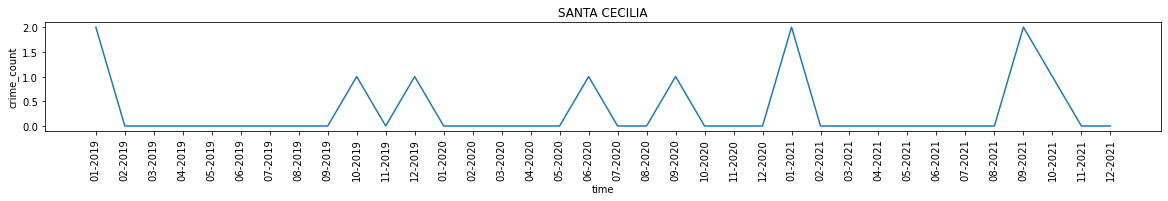

In [13]:
# Plot lineplots to analyse the crime counts time series per sampled neighborhood

for neighborhood in crime_counts_series.name_neigh.unique():
    dfn = crime_counts_series[crime_counts_series.name_neigh == neighborhood]
    fig, axes = plt.subplots(figsize=(20,2))
    ax = sns.lineplot(data=dfn, y='crime_count', x='time')
    ax.tick_params(axis='x', labelrotation=90)
    ax.set_xticks(dfn.time.unique())
    ax.set_title(neighborhood)
    plt.show()


In [14]:
# Plot the crime count distribution and q-q plot over all observations

def crimeCountsDistribution(data):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    sns.histplot(data['crime_count'], ax=axes[0], bins=30)
    axes[0].set_title('Histogram of crime counts')
    sm.qqplot(data['crime_count'], line ='45', ax=axes[1])
    axes[1].set_title('Q-Q plot of crime counts')
    #fig.tight_layout()
    #fig.subplots_adjust(top=0.95)


C:\Users\penny\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


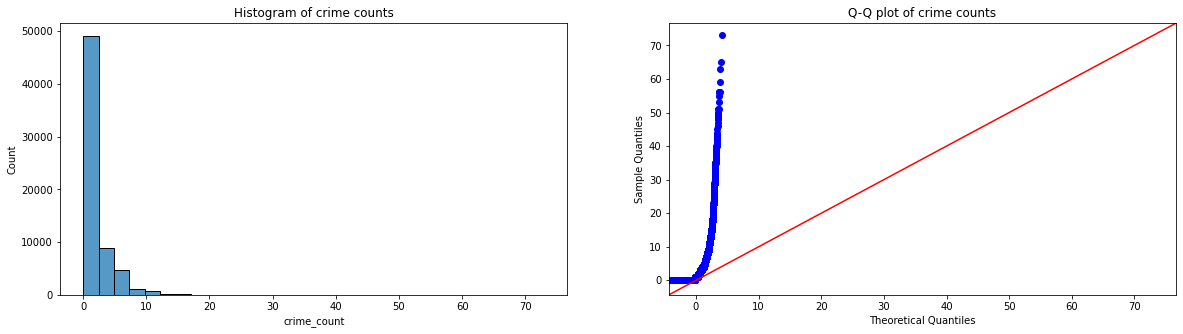

In [15]:
crimeCountsDistribution(df)

In [27]:
df.head(3)

,unique_id,month_event,year_event,key_neighb,name_neigh,key_boroug,name_borou,cablebus_s,commer_ven,health_cen,metro_sta,pmarkets,pparking,hospitals,train_sta,trolebus_s,cablebus_l,ptransp_ro,main_roads,metro_line,rtp_lines,train_line,trolebus_l,centres_va,be_schools,commercial,industrial,service_un,crime_count,women_vic,men_vic,less than 18,18 to 29,30 to 39,40 to 49,50 to 59,more than 60,geometry,unique_id_time
0,2019502-001,5,2019,02-001,AGUILERA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,2,0,9,1,0,6,0,1,0,1,63,10,43,1,0,2,1,0,1,0,0,0,POLYGON ((483311.6179775769 2153254.8476758953...,5-2019
1,2019502-002,5,2019,02-002,ALDANA,2,AZCAPOTZALCO,0,0,0,0,0,0,0,0,0,0,2,1,0,4,0,1,0,2,52,13,56,1,0,0,0,0,0,0,0,0,POLYGON ((484406.9560281149 2153012.3314251634...,5-2019
2,2019502-005,5,2019,02-005,ANGEL ZIMBRON,2,AZCAPOTZALCO,0,0,0,1,0,2,0,0,0,0,30,0,1,6,0,0,0,3,53,10,89,3,2,1,1,2,0,0,0,0,POLYGON ((480013.7551967221 2153003.6181812417...,5-2019


In [46]:
def dataBoxPlots(data):
    df = data.copy()
    fig, ax = plt.subplots(figsize=(8,5))
    ax = sns.boxplot(x=df)
    plt.show()


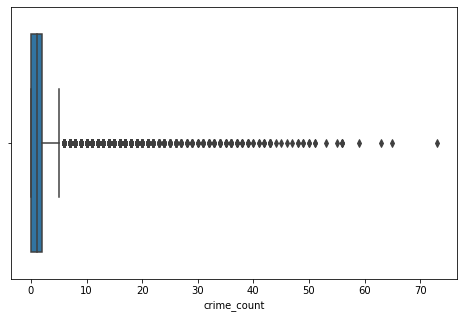

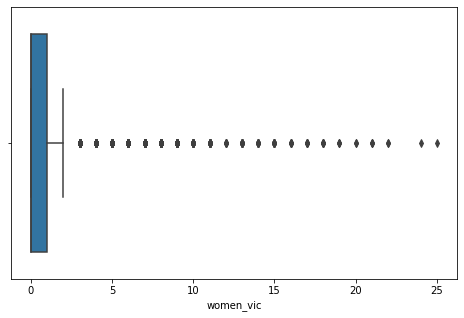

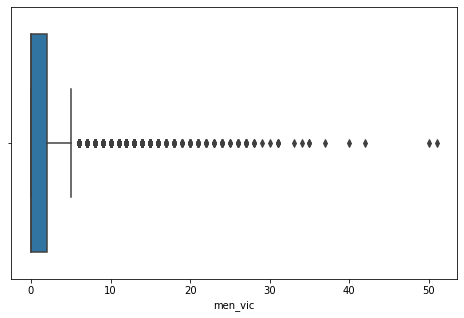

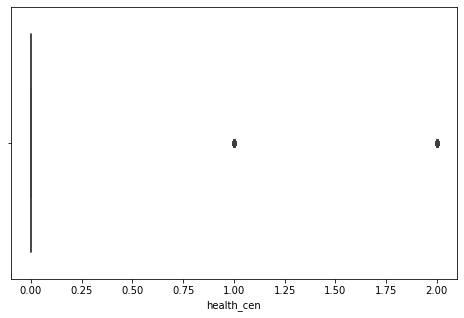

In [47]:
dataBoxPlots(df.crime_count)
dataBoxPlots(df.women_vic)
dataBoxPlots(df.men_vic)
dataBoxPlots(df.health_cen)

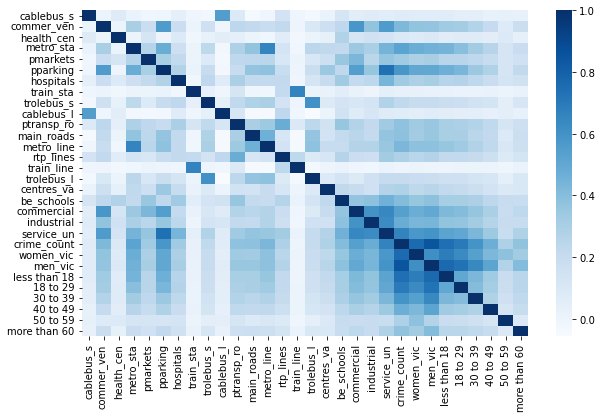

service_un      0.662675
crime_count     1.000000
women_vic       0.760832
men_vic         0.849278
less than 18    0.742991
18 to 29        0.698644
Name: crime_count, dtype: float64

In [55]:
corr_matrix = dataCorrelation(df)
corr_matrix[corr_matrix['crime_count'] > 0.6]['crime_count']

In [20]:
# Plot histograms of all features for all observations

def featuresHistograms(data):
    df = data.drop(['unique_id_time', 'month_event', 'year_event', 'name_neigh', 'key_neighb', 'key_boroug', 'name_borou', 'geometry'], axis=1).set_index('unique_id')
    df.hist(figsize=(15,15))
    plt.show()

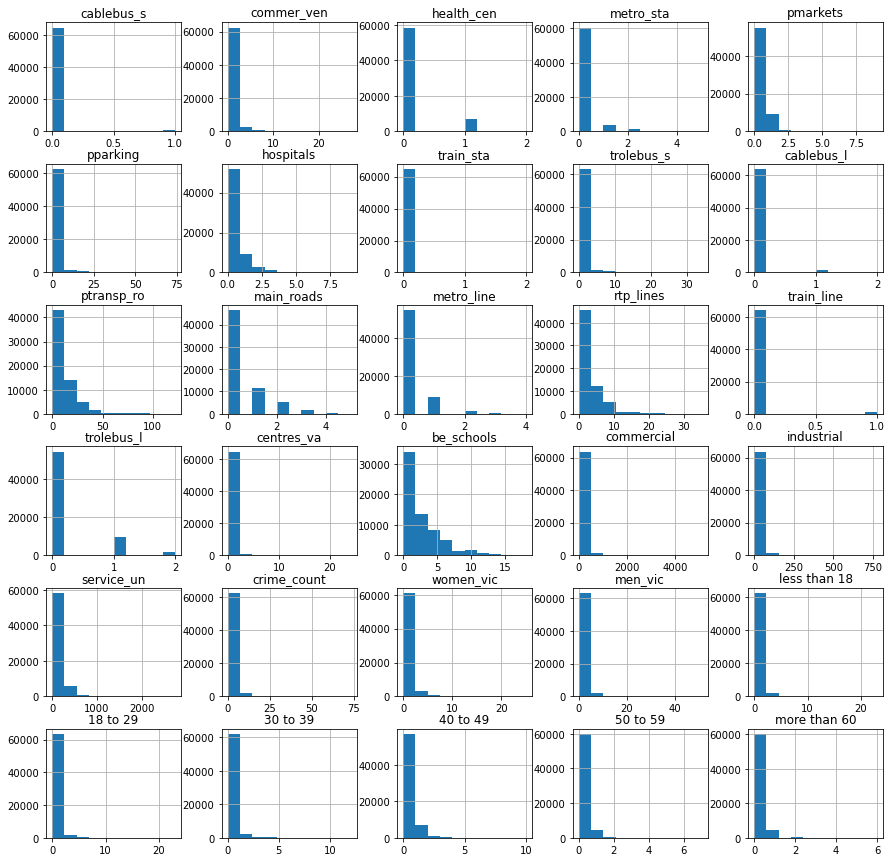

In [21]:
featuresHistograms(df)

In [58]:
df['crime_count'].describe()

count    65340.000000
mean         1.832706
std          3.041815
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         73.000000
Name: crime_count, dtype: float64